<a href="https://colab.research.google.com/github/HiroshiATakano/GitHub/blob/master/%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os

path = os.getcwd()

try:
  os.chdir(path + "/drive/My Drive/統計学Ⅲ:多変量データ解析法")
except:
  pass

os.getcwd()

'/content/drive/My Drive/統計学Ⅲ:多変量データ解析法'

In [ ]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=3ddaf73f06f79a0f71fdad4c92937bd8bff5db4c12d710ae25089e7898d5e5e2
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


In [ ]:
import numpy as np
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
%matplotlib inline

In [ ]:
import sklearn
from sklearn.decomposition import PCA



In [ ]:
from sklearn.preprocessing import StandardScaler

# サンプルデータの作成
data = {
    'Feature1': [2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2.0, 1.0, 1.5, 1.1],
    'Feature2': [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]
}
df = pd.DataFrame(data)

# データの標準化
scaler = StandardScaler()
X_std = scaler.fit_transform(df)

# PCAの適用
pca = PCA()
pca.fit(X_std)

# 主成分スコア
y = pca.transform(X_std)

# 固有値、固有ベクトル、寄与率
explained_variance = pca.explained_variance_  # 固有値
eigenvectors = pca.components_.T  # 固有ベクトル（列ベクトルとして表現）
explained_variance_ratio = pca.explained_variance_ratio_  # 寄与率

# 結果の表示
print("元のデータ:")
print(df)
print("\n主成分スコア:")
print(y)
print("\n固有値:")
print(explained_variance)
print("\n固有ベクトル:")
print(eigenvectors)
print("\n寄与率:")
print(explained_variance_ratio)

# 重み W は固有ベクトルに対応
W = eigenvectors
print("\n重み W:")
print(W)


元のデータ:
   Feature1  Feature2
0       2.5       2.4
1       0.5       0.7
2       2.2       2.9
3       1.9       2.2
4       3.1       3.0
5       2.3       2.7
6       2.0       1.6
7       1.0       1.1
8       1.5       1.6
9       1.1       0.9

主成分スコア:
[[ 1.08643242 -0.22352364]
 [-2.3089372   0.17808082]
 [ 1.24191895  0.501509  ]
 [ 0.34078247  0.16991864]
 [ 2.18429003 -0.26475825]
 [ 1.16073946  0.23048082]
 [-0.09260467 -0.45331721]
 [-1.48210777  0.05566672]
 [-0.56722643  0.02130455]
 [-1.56328726 -0.21536146]]

固有値:
[2.13992141 0.08230081]

固有ベクトル:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

寄与率:
[0.96296464 0.03703536]

重み W:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. サンプルデータの作成
np.random.seed(42)
n_samples = 100
n_features = 8
n_targets = 2

X = np.random.rand(n_samples, n_features)  # 説明変数（8個）
Y = np.random.rand(n_samples, n_targets)   # 目的変数（2個）

# 2. 主成分分析（PCA）の適用
pca = PCA(n_components=5)  # 主成分数を5に設定（情報を圧縮）
X_pca = pca.fit_transform(X)

# 3. データの分割（訓練データ 80%、テストデータ 20%）
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

# 4. 多変量線形回帰（MLR）の実行
mlr = LinearRegression()
mlr.fit(X_train, Y_train)

# 5. 予測
Y_pred = mlr.predict(X_test)

# 6. モデル評価（平均二乗誤差）
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("MSE for each target variable:", mse)

# 7. 主成分の寄与率の表示
print("Explained variance ratio of PCA components:", pca.explained_variance_ratio_)


MSE for each target variable: [0.08381687 0.07155215]
Explained variance ratio of PCA components: [0.17170889 0.16753664 0.14064483 0.12773004 0.12211042]


In [ ]:
df = pd.read_excel("sample_data.xlsx",index_col=0)
df

,性別,年齢,X1 外出できそう,X2 動きやすそう,X3 気分が華やぎそう,X4 高そう,X5 オンライン会議に対応できそう,X6 そのまま寝れそう,X7 お洒落に見えそう,X8 気分転換できそう,Y1 購入したい,Y2 着用してみたい
No,,,,,,,,,,,,
1,男性,40～49歳,4,4,4,4,4,4,4,3,4,2
1,女性,40～49歳,5,2,2,2,4,1,1,2,4,4
1,女性,30～39歳,2,5,3,2,2,5,3,4,2,1
1,女性,40～49歳,4,4,4,4,4,2,4,1,4,1
1,女性,20～29歳,2,5,3,2,4,4,2,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
8,女性,20～29歳,1,4,2,1,1,4,1,3,2,3
8,男性,20～29歳,2,5,4,5,4,5,4,5,4,4
8,女性,40～49歳,5,5,4,4,5,3,4,4,4,3


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 1. サンプルデータの作成
np.random.seed(42)
n_samples = 100
n_features = 8
n_targets = 2

# 説明変数（8個の数値データ）
X_numeric = np.random.rand(n_samples, n_features)

# 性別（カテゴリ変数：0=男性, 1=女性）
gender = np.random.choice([0, 1], size=n_samples)

# 年齢層（10代～60代）
age_group = np.random.choice([10, 20, 30, 40, 50, 60], size=n_samples)

# 目的変数（2個）
Y = np.random.rand(n_samples, n_targets)

# 2. 性別と年齢層を数値データに統合
X = np.column_stack((X_numeric, gender, age_group))

# 3. 標準化（PCA前にスケールを揃える）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. 主成分分析（PCA）
pca = PCA(n_components=5)  # 5つの主成分を抽出
X_pca = pca.fit_transform(X_scaled)

# 5. データの分割（訓練80%、テスト20%）
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

# 6. 多変量線形回帰（MLR）
mlr = LinearRegression()
mlr.fit(X_train, Y_train)

# 7. 予測
Y_pred = mlr.predict(X_test)

# 8. モデル評価（平均二乗誤差）
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("MSE for each target variable:", mse)

# 9. 主成分の寄与率を表示
print("Explained variance ratio of PCA components:", pca.explained_variance_ratio_)


MSE for each target variable: [0.11115645 0.09588726]
Explained variance ratio of PCA components: [0.16048733 0.13439049 0.11883277 0.11497094 0.10674988]


In [ ]:
data = df.iloc[:,2:-2]
data

,X1 外出できそう,X2 動きやすそう,X3 気分が華やぎそう,X4 高そう,X5 オンライン会議に対応できそう,X6 そのまま寝れそう,X7 お洒落に見えそう,X8 気分転換できそう
No,,,,,,,,
1,4,4,4,4,4,4,4,3
1,5,2,2,2,4,1,1,2
1,2,5,3,2,2,5,3,4
1,4,4,4,4,4,2,4,1
1,2,5,3,2,4,4,2,5
...,...,...,...,...,...,...,...,...
8,1,4,2,1,1,4,1,3
8,2,5,4,5,4,5,4,5
8,5,5,4,4,5,3,4,4


In [ ]:
col = list(data.columns)
col

['X1 外出できそう',
 'X2 動きやすそう',
 'X3 気分が華やぎそう',
 'X4 高そう',
 'X5 オンライン会議に対応できそう',
 'X6 そのまま寝れそう',
 'X7 お洒落に見えそう',
 'X8 気分転換できそう']

In [ ]:
correlation_matrix = data.corr()
correlation_matrix


,X1 外出できそう,X2 動きやすそう,X3 気分が華やぎそう,X4 高そう,X5 オンライン会議に対応できそう,X6 そのまま寝れそう,X7 お洒落に見えそう,X8 気分転換できそう
X1 外出できそう,1.000000,0.172649,0.145867,0.242379,0.650884,-0.071565,0.084317,0.131623
X2 動きやすそう,0.172649,1.000000,0.400679,0.138148,0.194375,0.532763,0.278937,0.223408
X3 気分が華やぎそう,0.145867,0.400679,1.000000,0.239933,0.177308,0.259952,0.710457,0.313080
X4 高そう,0.242379,0.138148,0.239933,1.000000,0.135003,0.047604,0.363148,0.342890
X5 オンライン会議に対応できそう,0.650884,0.194375,0.177308,0.135003,1.000000,-0.013035,0.110603,0.206472
X6 そのまま寝れそう,-0.071565,0.532763,0.259952,0.047604,-0.013035,1.000000,0.220303,0.119751
X7 お洒落に見えそう,0.084317,0.278937,0.710457,0.363148,0.110603,0.220303,1.000000,0.387993
X8 気分転換できそう,0.131623,0.223408,0.313080,0.342890,0.206472,0.119751,0.387993,1.000000


In [ ]:
# 固有値を計算
eigenvalues, _ = np.linalg.eig(correlation_matrix)

# 固有値の差を計算
eigen_differences = np.diff(eigenvalues, prepend=0)

# 固有値の比率を計算
eigen_ratio = eigenvalues / np.sum(eigenvalues)

# 累積比率を計算
eigen_cumulative_ratio = np.cumsum(eigen_ratio)

# 結果をデータフレームにまとめる
eigen_df = pd.DataFrame({
    'Eigenvalue': eigenvalues,
    'Difference': eigen_differences,
    'Ratio': eigen_ratio,
    'Cumulative Ratio': eigen_cumulative_ratio
})

# 結果を表示
print(eigen_df)


   Eigenvalue  Difference     Ratio  Cumulative Ratio
0    2.767724    2.767724  0.345965          0.345965
1    1.577847   -1.189877  0.197231          0.543196
2    1.177440   -0.400407  0.147180          0.690376
3    0.800206   -0.377234  0.100026          0.790402
4    0.670360   -0.129845  0.083795          0.874197
5    0.319326   -0.351034  0.039916          0.914113
6    0.255559   -0.063767  0.031945          0.946058
7    0.431538    0.175979  0.053942          1.000000


In [ ]:
dfs = data.apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs.describe()

,X1 外出できそう,X2 動きやすそう,X3 気分が華やぎそう,X4 高そう,X5 オンライン会議に対応できそう,X6 そのまま寝れそう,X7 お洒落に見えそう,X8 気分転換できそう
count,2.560000e+02,256.000000,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02
mean,-6.938894e-17,0.000000,2.428613e-17,2.081668e-17,-2.775558e-17,2.775558e-17,6.245005e-17,-1.387779e-17
std,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.171673e+00,-2.206612,-1.968413e+00,-1.549024e+00,-9.546985e-01,-1.995631e+00,-1.706173e+00,-1.106317e+00
25%,-1.171673e+00,-0.552461,-1.074949e+00,-6.925441e-01,-9.546985e-01,-1.228542e+00,-7.981059e-01,-1.106317e+00
50%,-4.692178e-01,0.274615,-1.814849e-01,1.639356e-01,-2.229535e-01,3.056372e-01,1.099613e-01,-2.948065e-01
75%,9.356917e-01,1.101691,7.119793e-01,1.020415e+00,1.240536e+00,1.072727e+00,1.018028e+00,5.167039e-01
max,1.638146e+00,1.101691,1.605443e+00,1.876895e+00,1.972281e+00,1.072727e+00,1.926096e+00,2.139725e+00


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
dfs = pd.DataFrame(scaler.fit_transform(data), index=df.index, columns=data.columns)

In [ ]:
# 主成分分析の実行

pca = PCA()
pca.fit(dfs)

feature = pca.transform(dfs)


In [ ]:
pd.DataFrame(feature, columns=["PC{}".format(x+1) for x in range(len(dfs.columns))]).describe()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
count,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02
mean,-2.775558e-17,1.387779e-17,-1.387779e-17,-8.673617e-18,1.387779e-17,3.816392e-17,9.540979e-18,2.775558e-17
std,1.666907e+00,1.258584e+00,1.087225e+00,8.962945e-01,8.203593e-01,6.582024e-01,5.661966e-01,5.065185e-01
min,-4.495827e+00,-2.808557e+00,-3.757092e+00,-3.216433e+00,-2.360647e+00,-2.322937e+00,-1.908165e+00,-1.398433e+00
25%,-1.189073e+00,-8.767500e-01,-7.622995e-01,-4.507625e-01,-4.641265e-01,-3.716420e-01,-3.288799e-01,-3.293983e-01
50%,8.857041e-02,9.957317e-03,-3.994607e-02,2.881492e-02,7.464979e-02,4.998755e-02,-8.966717e-02,3.193721e-02
75%,1.168299e+00,7.221670e-01,7.875623e-01,5.310826e-01,4.377984e-01,3.655166e-01,3.701846e-01,3.164612e-01
max,3.439082e+00,3.878679e+00,2.607667e+00,2.737686e+00,2.499041e+00,1.906565e+00,1.767323e+00,1.550697e+00


In [ ]:
# 主成分得点

df1 = pd.DataFrame(feature, columns=["PC{}".format(x+1) for x in range(len(dfs.columns))])
df1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.068447,0.893763,-0.192431,-0.040817,-0.297560,-0.426899,-0.231021,0.126407
1,-1.871077,3.273800,0.037975,-0.286194,0.501241,0.191401,0.297639,-0.347113
2,0.737618,-1.131462,0.803750,0.742024,1.336680,0.132253,0.159979,0.302897
3,1.086266,1.509316,-0.465954,-1.137077,-1.406913,0.507453,-0.705755,0.367708
4,0.824319,0.219014,0.855821,1.032273,2.334260,0.416497,-0.760478,-0.320342
...,...,...,...,...,...,...,...,...
251,-1.958396,-1.081977,0.975279,0.856568,1.483963,0.457480,0.147434,-0.313178
252,3.075937,-0.327077,-0.534613,1.507720,0.574083,-0.304779,-1.124311,-0.089839
253,2.859724,1.911181,-0.074000,0.099869,0.355081,0.467526,-0.301682,0.339769
254,2.175938,-0.262556,-0.392892,0.626884,0.249335,-0.704834,-0.011455,-0.033609


Text(0, 0.5, 'PC2')

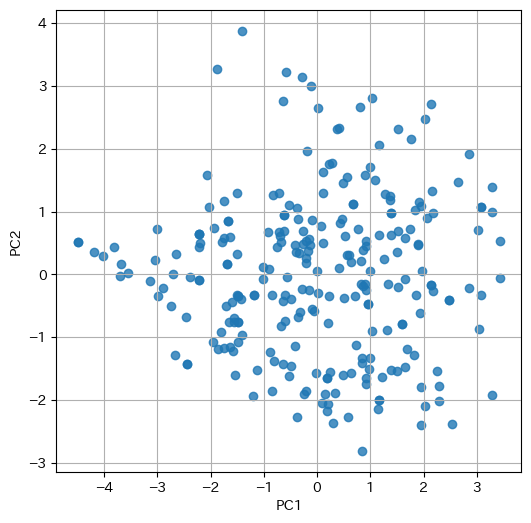

In [ ]:
#　第１主成分と第２主成分でプロットする

plt.figure(figsize=(6,6))
plt.scatter(feature[:,0], feature[:,1],alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")

In [ ]:
# 寄与率
pd.DataFrame(pca.explained_variance_ratio_, index=['PC{}'.format(x+1) for x in range(len(dfs.columns))])

,0
PC1,0.345965
PC2,0.197231
PC3,0.147180
PC4,0.100026
PC5,0.083795
PC6,0.053942
PC7,0.039916
PC8,0.031945


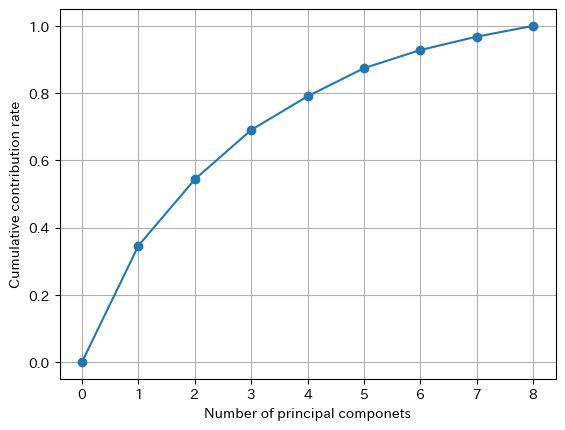

In [ ]:
# 累積寄与率を図示めする

import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0]+list(np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal componets")
plt.ylabel("Cumulative contribution rate")
plt.grid()

In [ ]:
# PCAの固有値

pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x+1) for x in range(len(dfs.columns))])



,0
PC1,2.778578
PC2,1.584035
PC3,1.182057
PC4,0.803344
PC5,0.672989
PC6,0.433230
PC7,0.320579
PC8,0.256561


In [ ]:
# PCAの固有ベクトル

pd.DataFrame(pca.components_, columns=col, index=["PC{}".format(x+1) for x in range(len(dfs.columns))])

,X1 外出できそう,X2 動きやすそう,X3 気分が華やぎそう,X4 高そう,X5 オンライン会議に対応できそう,X6 そのまま寝れそう,X7 お洒落に見えそう,X8 気分転換できそう
PC1,0.257978,0.379498,0.461157,0.318026,0.275550,0.258851,0.451222,0.359291
PC2,0.611688,-0.199197,-0.183382,0.116499,0.570144,-0.417469,-0.198377,0.016095
PC3,0.204019,0.499757,-0.118786,-0.416954,0.264094,0.500721,-0.327258,-0.305114
PC4,-0.044262,0.155425,-0.525187,0.547111,-0.120596,0.271062,-0.368884,0.417899
PC5,-0.172132,-0.036093,-0.044449,-0.594471,0.175854,-0.078126,-0.071380,0.756024
PC6,0.008842,0.695100,0.094668,0.006390,-0.266599,-0.634157,-0.184134,0.024883
PC7,0.694495,-0.137457,0.038028,-0.198728,-0.642417,0.137862,0.004277,0.161613
PC8,0.060586,0.197553,-0.671855,-0.138482,-0.004469,-0.085180,0.689097,-0.067866


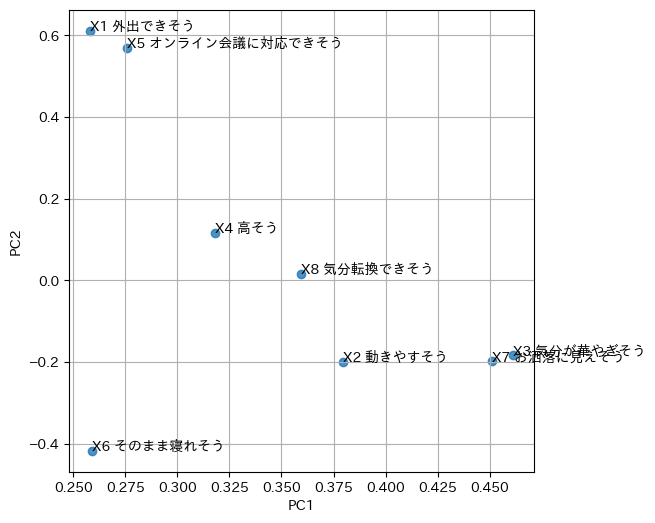

In [ ]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], df.columns[2:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()



In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

'''
# サンプルデータを生成
np.random.seed(42)
data = np.random.rand(10, 5)  # 10行×5列のランダムデータ
'''


data = dfs.to_numpy()

# データをPandas DataFrameとして扱う
df = pd.DataFrame(data, columns=[f"Feature_{i+1}" for i in range(data.shape[1])])
df.columns = col

# データの標準化
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

df2 = pd.DataFrame(standardized_data, columns=[f"Feature_{i+1}" for i in range(data.shape[1])])

# 主成分分析の実行
pca = PCA()
pca.fit(standardized_data)

# 主成分スコア
scores = pca.transform(standardized_data)

# 固有値
eigenvalues = pca.explained_variance_

# 寄与率
explained_variance_ratio = pca.explained_variance_ratio_

# 固有ベクトル（重み W）
eigenvectors = pca.components_

# 主成分スコアの分散を1に調整
adjusted_scores = scores / np.sqrt(eigenvalues)

# 主成分付加量の計算
# PCC = 固有ベクトル * √(固有値)
pcc = eigenvectors.T * np.sqrt(eigenvalues)


# 結果を表示
print("標準化データ:")
print(standardized_data)
print("\n主成分スコア (y):")
print(scores)
print("\n固有値:")
print(eigenvalues)
print("\n寄与率:")
print(explained_variance_ratio)
print("\n固有ベクトル (重み W):")
print(eigenvectors)
print("\n主成分付加量 (PCC):")
print(pcc)


# データ再構成の確認（元のスケールに戻す）
reconstructed_data = scaler.inverse_transform(np.dot(scores, eigenvectors))
print("\n再構成データ:")
print(reconstructed_data)

# 元データとの比較
print("\n元データ:")
print(data)
df

標準化データ:
[[ 0.93752458  0.27515296  0.71337393 ...  0.30623589  1.02002262
   0.51771604]
 [ 1.64135535 -1.38223898 -1.07705476 ... -1.99954024 -1.70951526
  -0.295384  ]
 [-0.47013696  1.10384893 -0.18184041 ...  1.07482794  0.11017666
   1.33081609]
 ...
 [ 1.64135535  1.10384893  0.71337393 ... -0.46235615  1.02002262
   1.33081609]
 [ 0.23369381  0.27515296  0.71337393 ...  1.07482794  1.02002262
   1.33081609]
 [-0.47013696  0.27515296  0.71337393 ... -0.46235615  1.02002262
   1.33081609]]

主成分スコア (y):
[[ 2.06844736  0.89376256 -0.19243107 ... -0.42689927 -0.23102102
   0.12640661]
 [-1.87107719  3.2737998   0.03797482 ...  0.19140104  0.29763855
  -0.34711335]
 [ 0.73761801 -1.1314624   0.80374958 ...  0.13225273  0.15997851
   0.30289715]
 ...
 [ 2.85972389  1.91118088 -0.07400032 ...  0.46752584 -0.30168205
   0.33976937]
 [ 2.17593842 -0.26255617 -0.39289194 ... -0.70483378 -0.01145497
  -0.03360944]
 [ 1.32354768 -0.15132903 -0.94837419 ...  0.25827508 -0.54164138
   0.173524

,X1 外出できそう,X2 動きやすそう,X3 気分が華やぎそう,X4 高そう,X5 オンライン会議に対応できそう,X6 そのまま寝れそう,X7 お洒落に見えそう,X8 気分転換できそう
0,0.937525,0.275153,0.713374,1.022414,1.242966,0.306236,1.020023,0.517716
1,1.641355,-1.382239,-1.077055,-0.693901,1.242966,-1.999540,-1.709515,-0.295384
2,-0.470137,1.103849,-0.181840,-0.693901,-0.223390,1.074828,0.110177,1.330816
3,0.937525,0.275153,0.713374,1.022414,1.242966,-1.230948,1.020023,-1.108484
4,-0.470137,1.103849,-0.181840,-0.693901,1.242966,0.306236,-0.799669,2.143916
...,...,...,...,...,...,...,...,...
251,-1.173968,0.275153,-1.077055,-1.552058,-0.956569,0.306236,-1.709515,0.517716
252,-0.470137,1.103849,0.713374,1.880571,1.242966,1.074828,1.020023,2.143916
253,1.641355,1.103849,0.713374,1.022414,1.976145,-0.462356,1.020023,1.330816
254,0.233694,0.275153,0.713374,1.022414,0.509788,1.074828,1.020023,1.330816


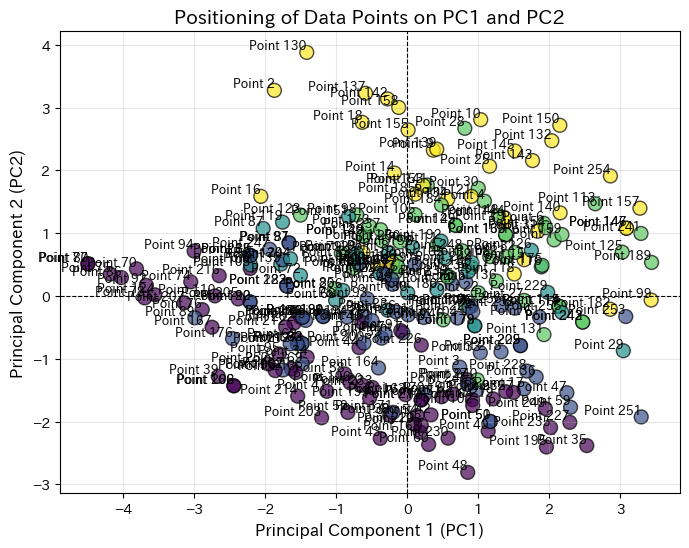

In [ ]:
scores = pca.fit_transform(standardized_data)  # 主成分スコア

# 第1主成分（PC1）と第2主成分（PC2）を抽出
pc1 = scores[:, 0]
pc2 = scores[:, 1]

# プロットの作成
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2, c=list(df.iloc[:,0]), edgecolor='k', alpha=0.7, s=100)
for i, (x, y) in enumerate(zip(pc1, pc2)):
    plt.text(x, y, f"Point {i+1}", fontsize=9, ha='right', va='bottom')

# グラフの装飾
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.title("Positioning of Data Points on PC1 and PC2", fontsize=14)
plt.xlabel("Principal Component 1 (PC1)", fontsize=12)
plt.ylabel("Principal Component 2 (PC2)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

主成分付加量 (PCC):
                        PC1       PC2       PC3       PC4       PC5       PC6  \
X1 外出できそう          0.430025  0.769861  0.221814  0.039672  0.141210  0.005820   
X2 動きやすそう          0.632587  0.250707  0.543348  0.139306  0.029609  0.457517   
X3 気分が華やぎそう        0.768706  0.230802  0.129147  0.470722  0.036464  0.062311   
X4 高そう             0.530119  0.146624  0.453323  0.490372  0.487680  0.004206   
X5 オンライン会議に対応できそう  0.459315  0.717574  0.287129  0.108090  0.144264  0.175476   
X6 そのまま寝れそう        0.431481  0.525420  0.544396  0.242951  0.064091  0.417404   
X7 お洒落に見えそう        0.752144  0.249674  0.355803  0.330628  0.058557  0.121198   
X8 気分転換できそう        0.598905  0.020257  0.331727  0.374561  0.620212  0.016378   

                        PC7       PC8  
X1 外出できそう          0.393221  0.030688  
X2 動きやすそう          0.077828  0.100064  
X3 気分が華やぎそう        0.021531  0.340307  
X4 高そう             0.112519  0.070144  
X5 オンライン会議に対応できそう  0.363734  0.002264  
X6 そのまま寝れそう     

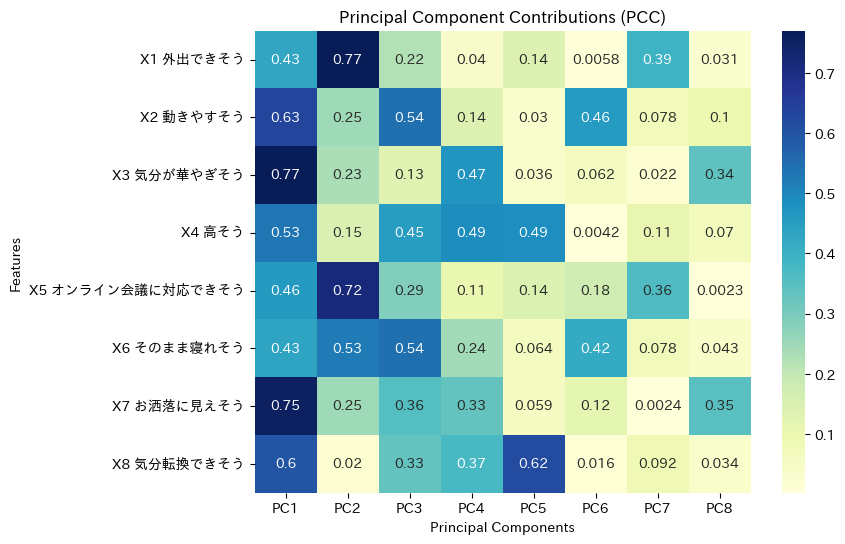

In [ ]:
# PCCの絶対値を計算
pcc_abs = np.abs(pcc)

# PCCをデータフレーム化
pcc_df = pd.DataFrame(
    pcc_abs,
    columns=[f"PC{i+1}" for i in range(pcc_abs.shape[1])],
    #index=[f"Feature_{i+1}" for i in range(pcc_abs.shape[0])]
    index=col
)

# 主成分ごとの最大寄与変数を特定
max_contributions = pcc_df.idxmax(axis=0)

# 結果を表示
print("主成分付加量 (PCC):")
print(pcc_df)
print("\n各主成分への最大寄与変数:")
print(max_contributions)

# ヒートマップで視覚化（オプション）
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(pcc_df, annot=True, cmap="YlGnBu", cbar=True)
plt.title("Principal Component Contributions (PCC)")
plt.xlabel("Principal Components")
plt.ylabel("Features")
plt.show()

分散説明率:
[0.34596547 0.19723087 0.14717997 0.10002573 0.08379506 0.05394226
 0.03991578 0.03194485]

累積分散説明率:
[0.34596547 0.54319634 0.69037631 0.79040204 0.8741971  0.92813937
 0.96805515 1.        ]


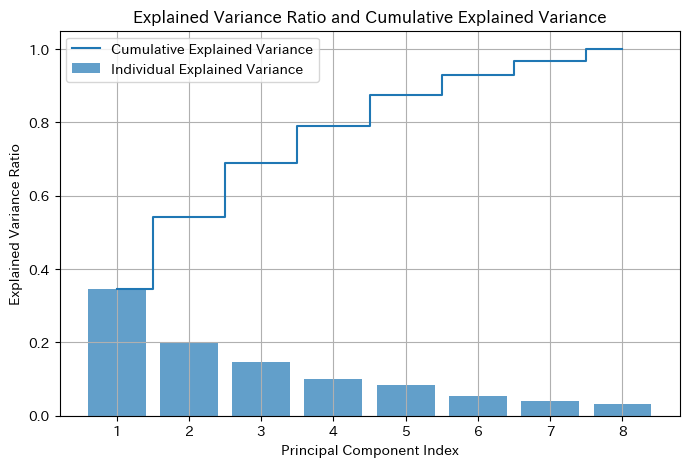

In [ ]:
# 分散説明率と累積分散説明率
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 結果を表示
print("分散説明率:")
print(explained_variance_ratio)
print("\n累積分散説明率:")
print(cumulative_variance_ratio)

# 分散説明率のプロット
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio and Cumulative Explained Variance')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [ ]:
pcc_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
X1 外出できそう,0.430025,0.769861,0.221814,0.039672,0.141210,0.005820,0.393221,0.030688
X2 動きやすそう,0.632587,0.250707,0.543348,0.139306,0.029609,0.457517,0.077828,0.100064
X3 気分が華やぎそう,0.768706,0.230802,0.129147,0.470722,0.036464,0.062311,0.021531,0.340307
X4 高そう,0.530119,0.146624,0.453323,0.490372,0.487680,0.004206,0.112519,0.070144
X5 オンライン会議に対応できそう,0.459315,0.717574,0.287129,0.108090,0.144264,0.175476,0.363734,0.002264
X6 そのまま寝れそう,0.431481,0.525420,0.544396,0.242951,0.064091,0.417404,0.078057,0.043145
X7 お洒落に見えそう,0.752144,0.249674,0.355803,0.330628,0.058557,0.121198,0.002422,0.349040
X8 気分転換できそう,0.598905,0.020257,0.331727,0.374561,0.620212,0.016378,0.091505,0.034376


In [ ]:
# 第3主成分までを保持
num_components = 3
scores_reduced = scores[:, :num_components]
eigenvectors_reduced = pca.components_[:num_components]

# データの再構成（第3主成分まで）
reconstructed_data = np.dot(scores_reduced, eigenvectors_reduced)

# 残差（誤差）の計算
residual_data = standardized_data - reconstructed_data

# 元のスケールに戻す
reconstructed_original_scale = scaler.inverse_transform(reconstructed_data)
residual_original_scale = scaler.inverse_transform(residual_data)

# 各変数の分散を計算
variances = np.var(data, axis=0)

# 元データに分散列を追加
df_with_variance = df.copy()
df_with_variance.loc["Variance"] = variances

# 結果を表示
print("\n再構成データ (第3主成分まで):")
print(reconstructed_original_scale)
print("\n残差 (誤差):")
print(residual_original_scale)
print("\n各変数の分散:")
print(variances)



再構成データ (第3主成分まで):
[[ 1.04105761e+00  5.10767424e-01  8.12837159e-01 ...  6.59477568e-02
   8.19001026e-01  8.16273290e-01]
 [ 1.52759656e+00 -1.34322331e+00 -1.46772875e+00 ... -1.83202570e+00
  -1.50614401e+00 -6.31156627e-01]
 [-3.37833320e-01  9.06987772e-01  4.52173630e-01 ...  1.06573772e+00
   2.94251848e-01  1.57357122e-03]
 ...
 [ 1.89169420e+00  6.67574740e-01  9.77095429e-01 ... -9.46692430e-02
   9.35452562e-01  1.08081232e+00]
 [ 3.20583488e-01  6.81713874e-01  1.09826793e+00 ...  4.76124269e-01
   1.16249249e+00  8.97446454e-01]
 [ 5.53932711e-02  5.84713961e-02  7.50768451e-01 ... -6.90933734e-02
   9.37596304e-01  7.62465618e-01]]

残差 (誤差):
[[-0.10353303 -0.23561446 -0.09946323 ...  0.24028814  0.20102159
  -0.29855725]
 [ 0.1137588  -0.03901568  0.39067399 ... -0.16751454 -0.20337126
   0.33577263]
 [-0.13230364  0.19686116 -0.63401404 ...  0.00909022 -0.18407519
   1.32924251]
 ...
 [-0.25033885  0.43627419 -0.2637215  ... -0.36768691  0.08457006
   0.25000376]
 [-0.0

主成分付加量（回転前）:
[[ 0.43002457  0.76986131  0.22181427 -0.03967198 -0.14120991  0.00581986
   0.39322095  0.03068791]
 [ 0.63258734 -0.25070652  0.5433477   0.13930644 -0.02960912  0.45751655
  -0.07782778  0.100064  ]
 [ 0.7687059  -0.23080221 -0.12914742 -0.47072206 -0.03646374  0.06231063
   0.02153136 -0.34030723]
 [ 0.53011936  0.14662386 -0.45332265  0.49037217 -0.48768004  0.00420604
  -0.11251911 -0.07014355]
 [ 0.45931548  0.71757415  0.28712912 -0.10808962  0.14426369 -0.17547628
  -0.3637343  -0.00226372]
 [ 0.43148079 -0.52541993  0.54439568  0.24295117 -0.06409138 -0.41740362
   0.07805689 -0.04314503]
 [ 0.75214434 -0.24967393 -0.35580261 -0.33062846 -0.05855709 -0.12119775
   0.00242184  0.34904013]
 [ 0.5989048   0.0202568  -0.33172745  0.37456083  0.62021151  0.01637773
   0.09150477 -0.03437556]]

主成分付加量（バリマックス回転後）:
[[ 0.049106    0.92645556 -0.05055986  0.12036886  0.03806225  0.07418471
  -0.34500866  0.01273669]
 [ 0.17050501  0.07772508  0.28626557  0.04744526  0.0902

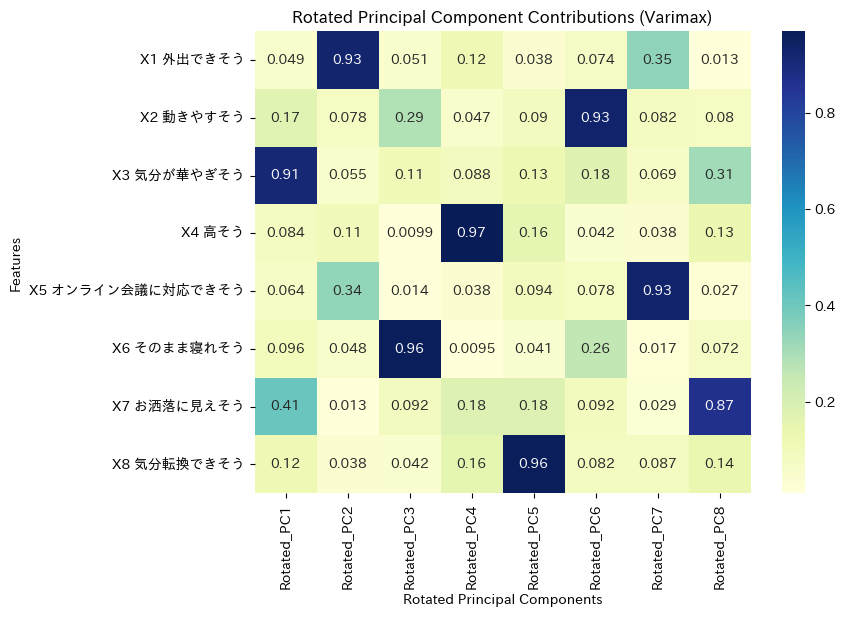

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.linalg import svd

# バリマックス回転法の関数
def varimax(Phi, gamma=1.0, q=20, tol=1e-6):
    p, k = Phi.shape
    R = np.eye(k)
    d = 0
    for i in range(q):
        d_old = d
        Lambda = np.dot(Phi, R)
        u, s, vh = svd(np.dot(Phi.T, Lambda**3 - (gamma / p) * np.dot(Lambda, np.diag(np.sum(Lambda**2, axis=0)))))
        R = np.dot(u, vh)
        d = np.sum(s)
        if d_old != 0 and d / d_old < 1 + tol:
            break
    return np.dot(Phi, R)

'''
# サンプルデータを生成
np.random.seed(42)
data = np.random.rand(10, 5)  # 10行×5列のランダムデータ

# データの標準化
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

# 主成分分析の実行
pca = PCA()
pca.fit(standardized_data)

# 固有ベクトル（重み W）と固有値
eigenvectors = pca.components_.T
eigenvalues = pca.explained_variance_

# 主成分付加量の計算
pcc = eigenvectors * np.sqrt(eigenvalues)
'''

# バリマックス回転の適用
rotated_pcc = varimax(pcc)

# 結果を表示
print("主成分付加量（回転前）:")
print(pcc)
print("\n主成分付加量（バリマックス回転後）:")
print(rotated_pcc)

# 主成分付加量の絶対値をデータフレームに変換
rotated_pcc_abs = pd.DataFrame(
    np.abs(rotated_pcc),
    columns=[f"Rotated_PC{i+1}" for i in range(rotated_pcc.shape[1])],
    #index=[f"Feature_{i+1}" for i in range(rotated_pcc.shape[0])],
    index=col
)

# 最大寄与変数の特定
max_contributions = rotated_pcc_abs.idxmax(axis=0)

print("\nバリマックス回転後の主成分ごとの最大寄与変数:")
print(max_contributions)

# ヒートマップで視覚化（オプション）
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(rotated_pcc_abs, annot=True, cmap="YlGnBu", cbar=True)
plt.title("Rotated Principal Component Contributions (Varimax)")
plt.xlabel("Rotated Principal Components")
plt.ylabel("Features")
plt.show()
